In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.metrics import r2_score

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## EDA

Text(0.5, 1.0, 'Correlation ')

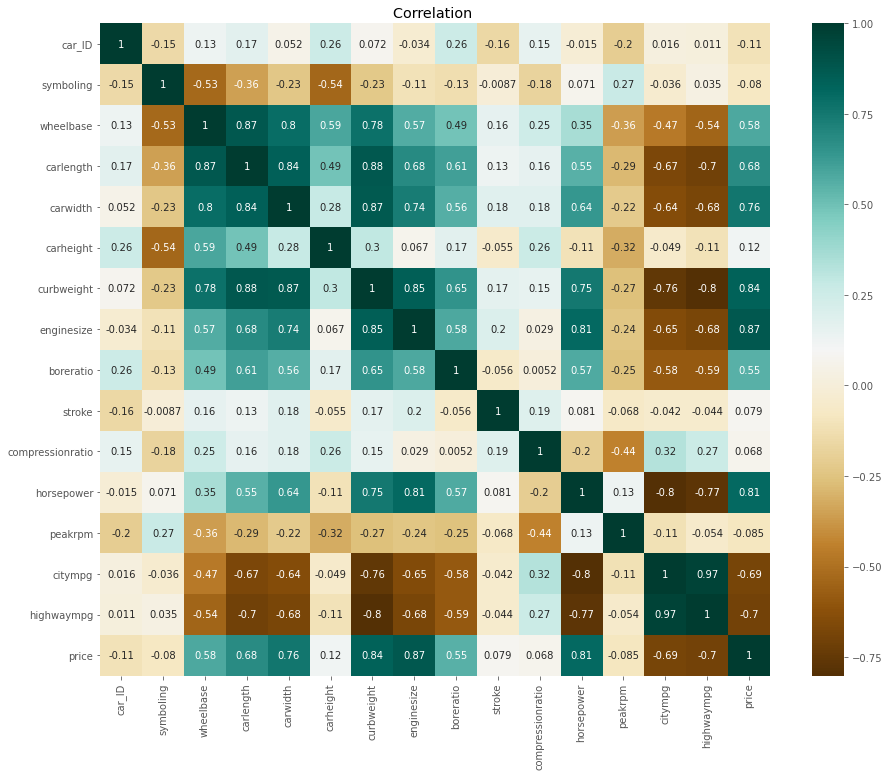

In [7]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG',annot=True)
r.set_title("Correlation ")

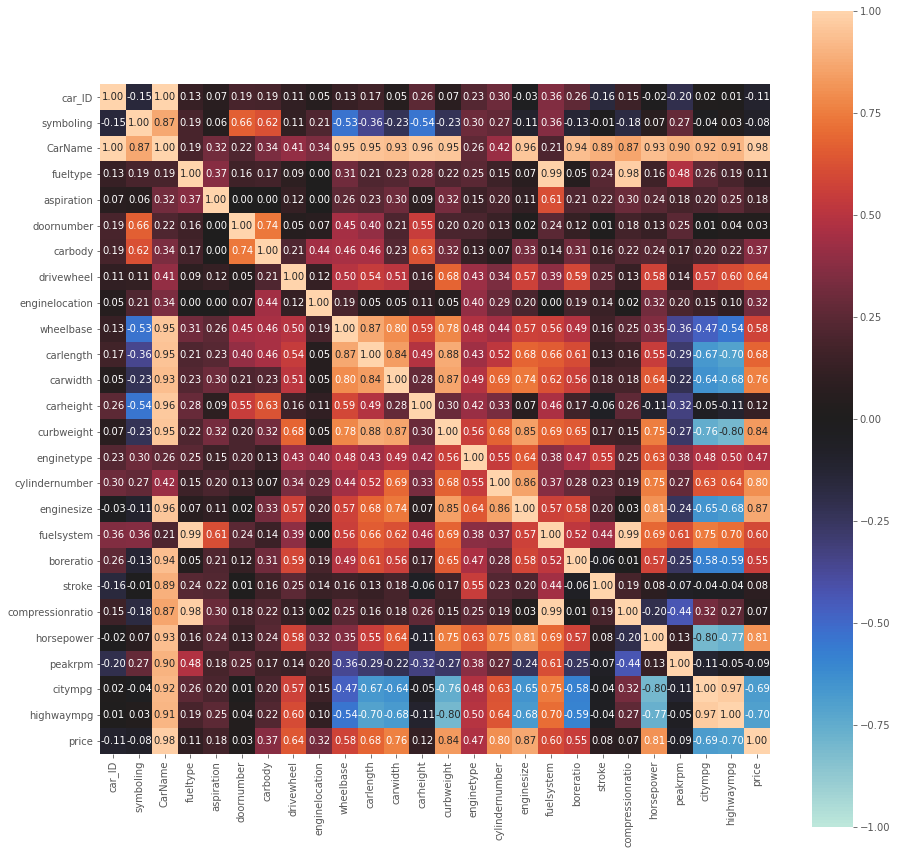

In [8]:
from dython.nominal import associations
associations(df, figsize = (15, 15))
plt.show()

 ## positive correlation
 - car name and symboling are higly positive correlated with 85%
 - fuel type and compression ratio are positively correlated with 98%
 - fuel type and fuel system are highly correlated with 99%
 - car length and wheel base are positively correlated with 87%
 - carwidth and wheel base are positively correlated with 80%
 - curblength are positively correlated with carwidth and car length.
 - engine size and price are highly are highly correlated.
 - highwaympg and citympg are positively correlated.
 - compression ratio and fuelsystem are 99% positively correlated.
 - cylindernumber and price are correlated
 - curbweight and price are related.
 - carname are mostly correalted with every feature.
 

## negative correlation
- citympg, highwaympg and price are negatively correlated.
- highwaympg and carlength are negatively correlated with 70%.
- citympg, highwaympg and horsepower are negatively correlated with 80%.
- curbweight and highwaympg are negatively correlated with 80%.

In [9]:
categorical = df.select_dtypes(include='object')
categorical.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

## 1.Fueltype

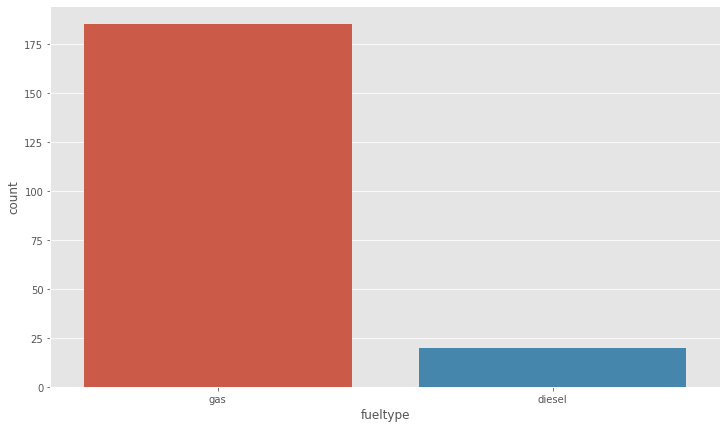

In [10]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'fueltype', data = df)
plt.show()

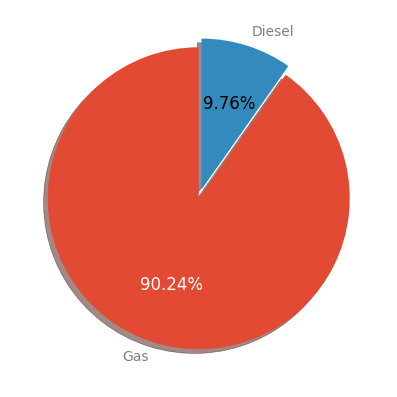

In [11]:
values = df['fueltype'].value_counts()
labels = ['Gas', 'Diesel']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

### - mostly gas fueltype is used in cars.

<Figure size 864x504 with 0 Axes>

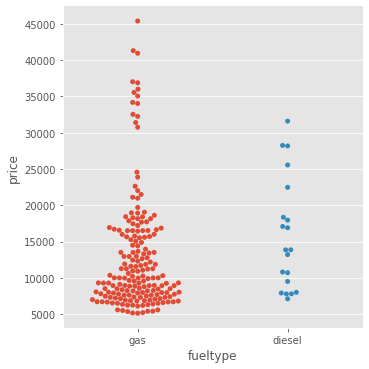

In [12]:
plt.figure(figsize = (12, 7))
sns.catplot(data=df, x="fueltype", y="price",kind = 'swarm')

## 2. aspiration

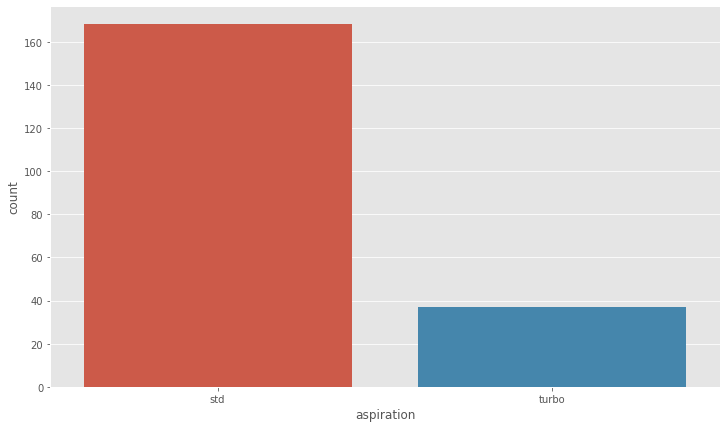

In [13]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'aspiration', data = df)
plt.show()

<AxesSubplot: xlabel='aspiration', ylabel='price'>

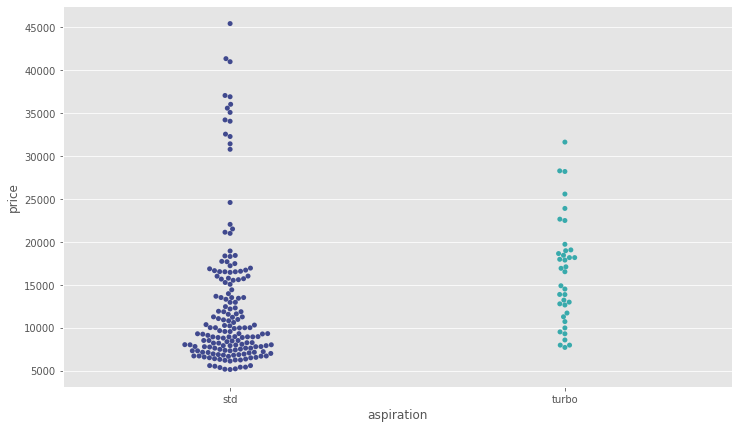

In [14]:
plt.figure(figsize = (12, 7))
sns.swarmplot(data=df, x="aspiration", y="price",palette='mako')

####  - Mostly cars  is of standard aspiration.
####  - The price for std is slightly high.

## 3. doornumber

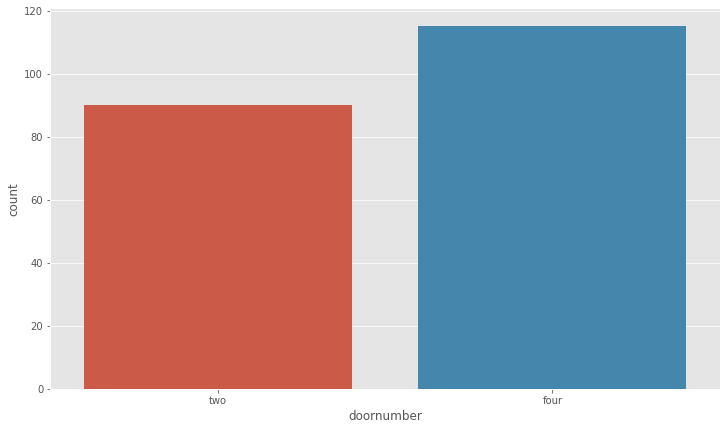

In [15]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'doornumber', data = df)
plt.show()

<Figure size 864x504 with 0 Axes>

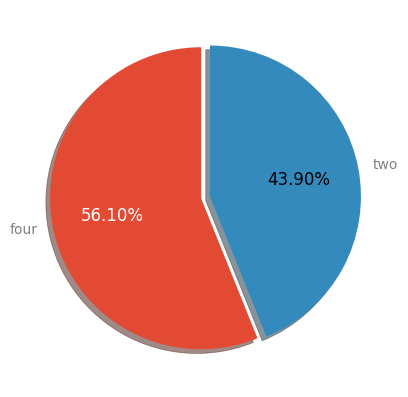

In [16]:
plt.figure(figsize = (12, 7))
values = df['doornumber'].value_counts()
labels = ['four', 'two']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

<Figure size 864x504 with 0 Axes>

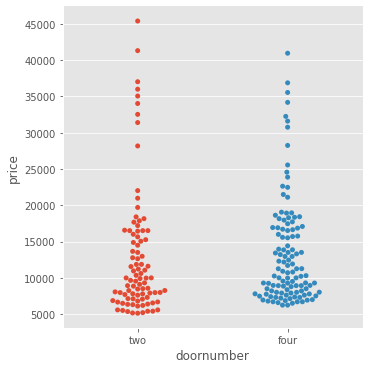

In [17]:
plt.figure(figsize = (12, 7))
sns.catplot(data=df, x="doornumber", y="price",kind = 'swarm')

### 4. carbody

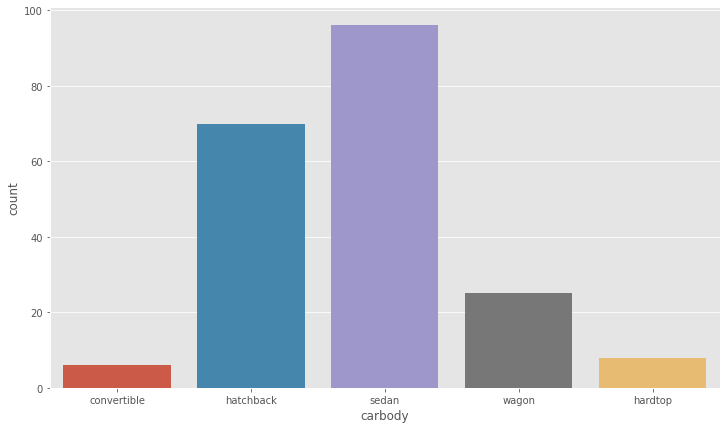

In [18]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'carbody', data = df)
plt.show()

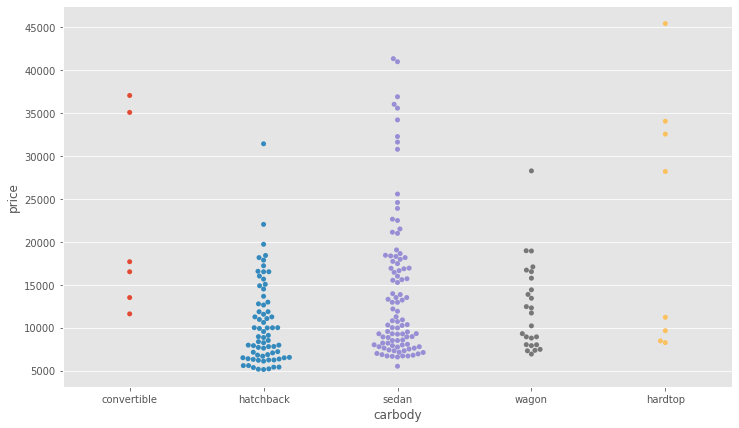

In [19]:
plt.figure(figsize = (12, 7))
sns.swarmplot(data=df, x="carbody", y="price")
plt.show()

- mostly cars are sedan and hatchback
- hardtop carbody is costly.

### 5. drivewheel

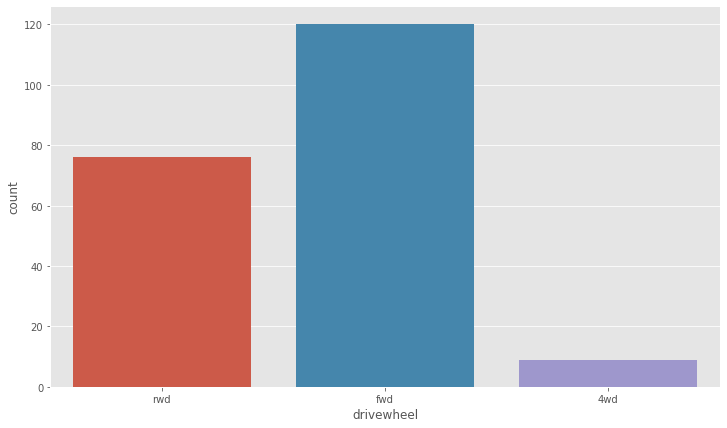

In [20]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'drivewheel', data = df)
plt.show()

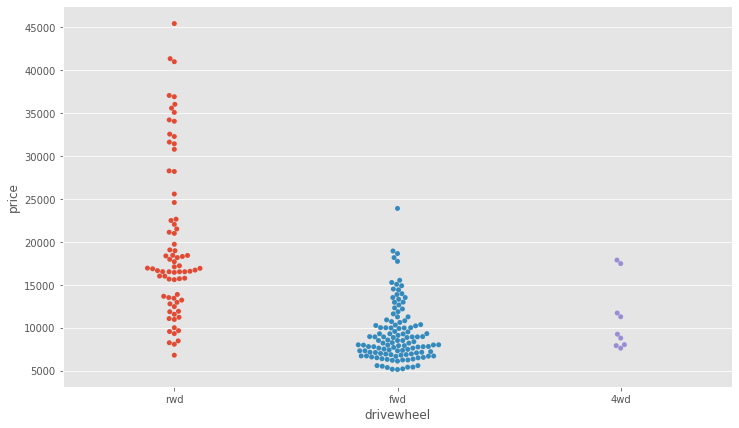

In [21]:
plt.figure(figsize = (12, 7))
sns.swarmplot(data=df, x="drivewheel", y="price")
plt.show()

#### mostly fwd drivewheel is used as it is also cheaper.

### 6.enginelocation

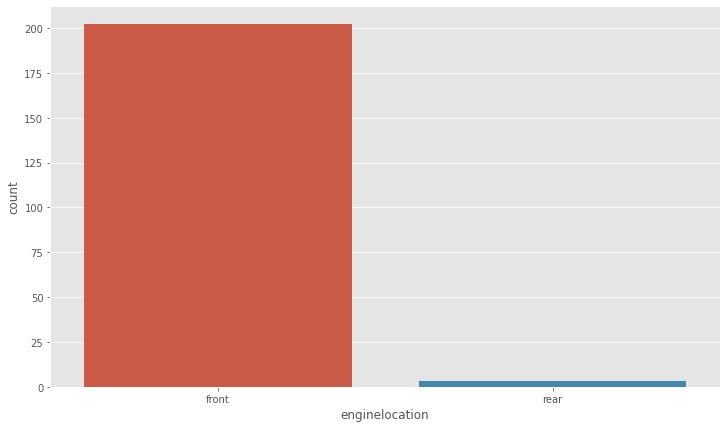

In [22]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'enginelocation', data = df)
plt.show()

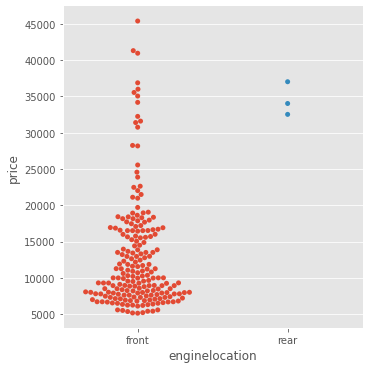

In [23]:
sns.catplot(data=df, x="enginelocation", y="price",kind = 'swarm')

#### mostly front  enginelocation is used and it is also cheaper.

### 7.enginetype

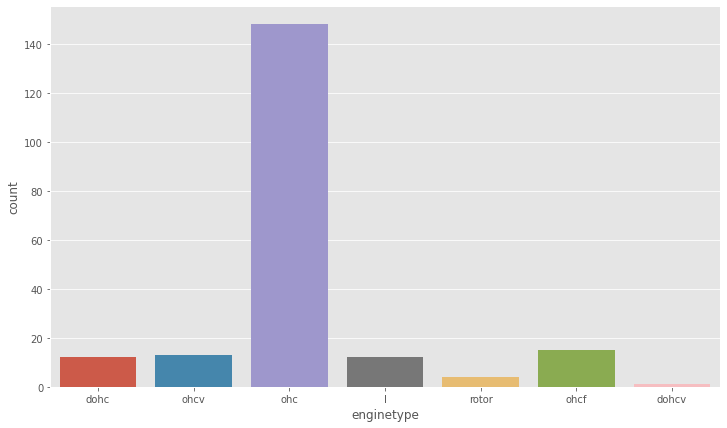

In [24]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'enginetype', data = df)
plt.show()

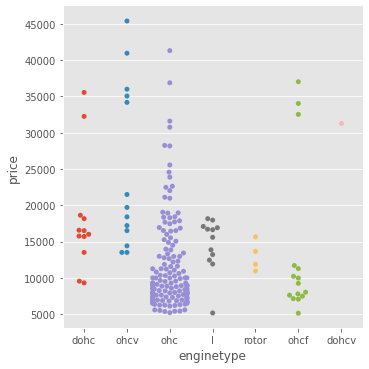

In [25]:
sns.catplot(data=df, x="enginetype", y="price",kind = 'swarm')

#### ohc engine type is widely used.

### 8. cylinder number

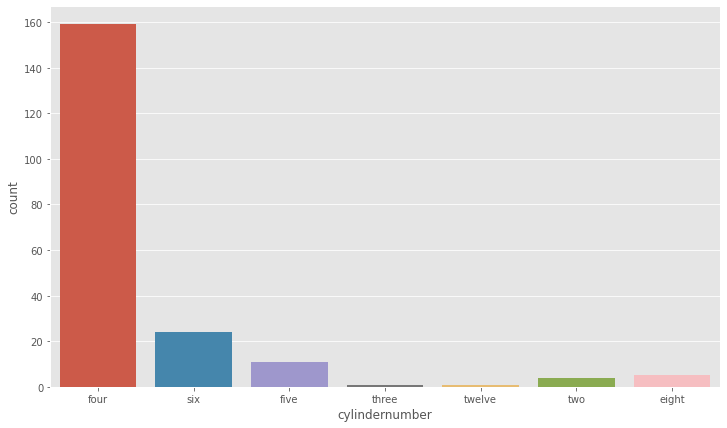

In [26]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'cylindernumber', data = df)
plt.show()

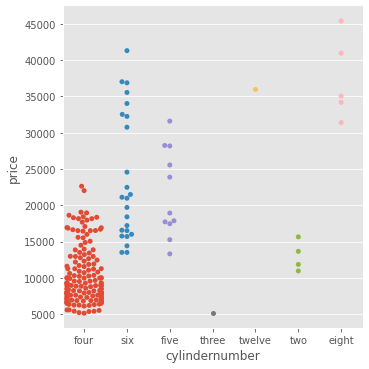

In [27]:
sns.catplot(data=df, x="cylindernumber", y="price",kind = 'swarm')

- mostly four cylinders are used.
- cars with eight cylinder is very costly.
- the number of cylinder increases, price also increases.


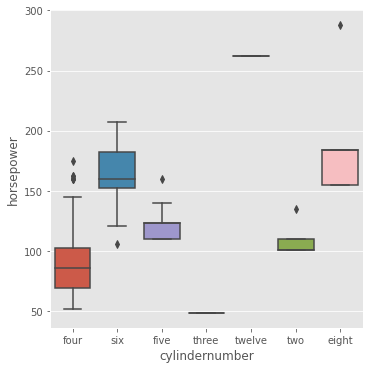

In [28]:
sns.catplot(data=df, x="cylindernumber", y="horsepower",kind = 'box')

<AxesSubplot: xlabel='cylindernumber', ylabel='price'>

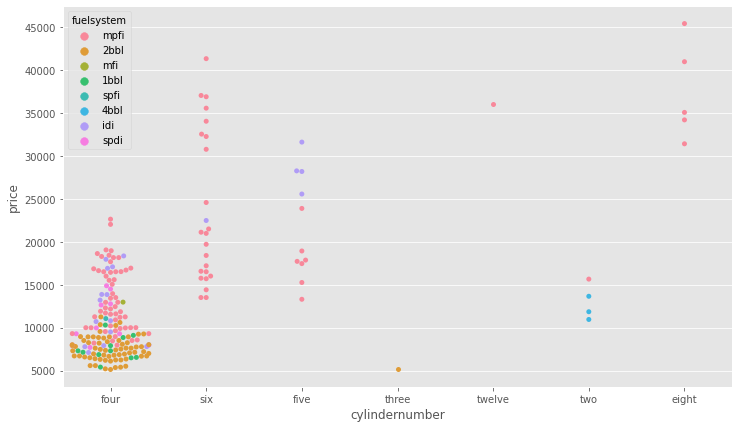

In [29]:
plt.figure(figsize = (12, 7))
sns.swarmplot(data=df, x="cylindernumber", y="price",hue = 'fuelsystem')

- mostly 2bbl fuelsystem is used where cylinder number is four.

### 9.fuelsystem

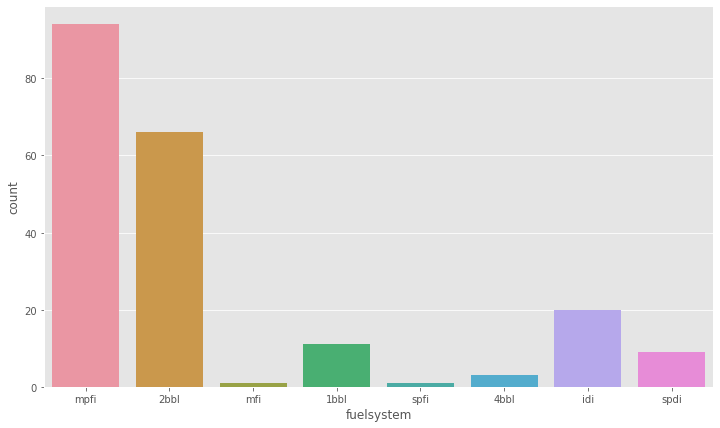

In [30]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'fuelsystem', data = df)
plt.show()

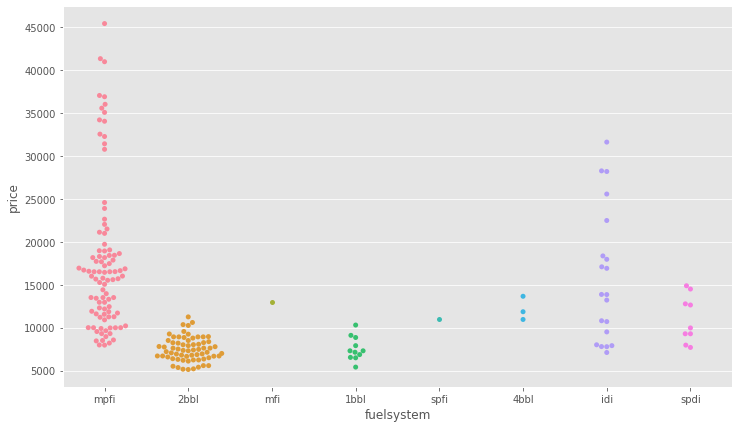

In [31]:
plt.figure(figsize = (12, 7))
sns.swarmplot(data=df, x="fuelsystem", y="price")
plt.show()

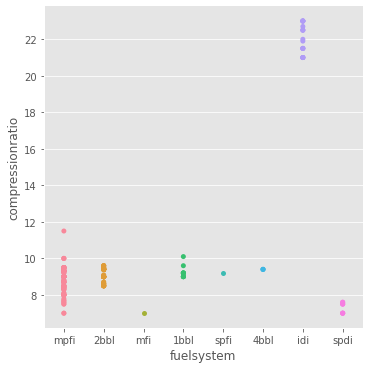

In [32]:
sns.catplot(data=df, x="fuelsystem", y="compressionratio",kind = 'strip',jitter=False)

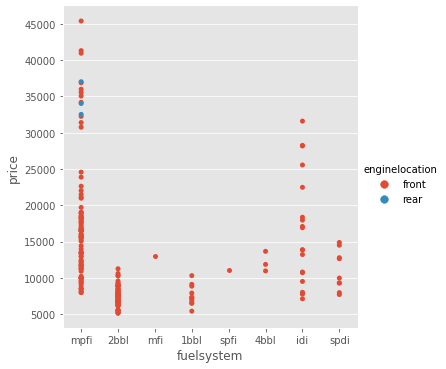

In [33]:
sns.catplot(data=df, x="fuelsystem", y="price",kind = 'strip',jitter=False,hue='enginelocation')

## Numerical categories

In [34]:
numerical = df.select_dtypes(exclude = 'object')

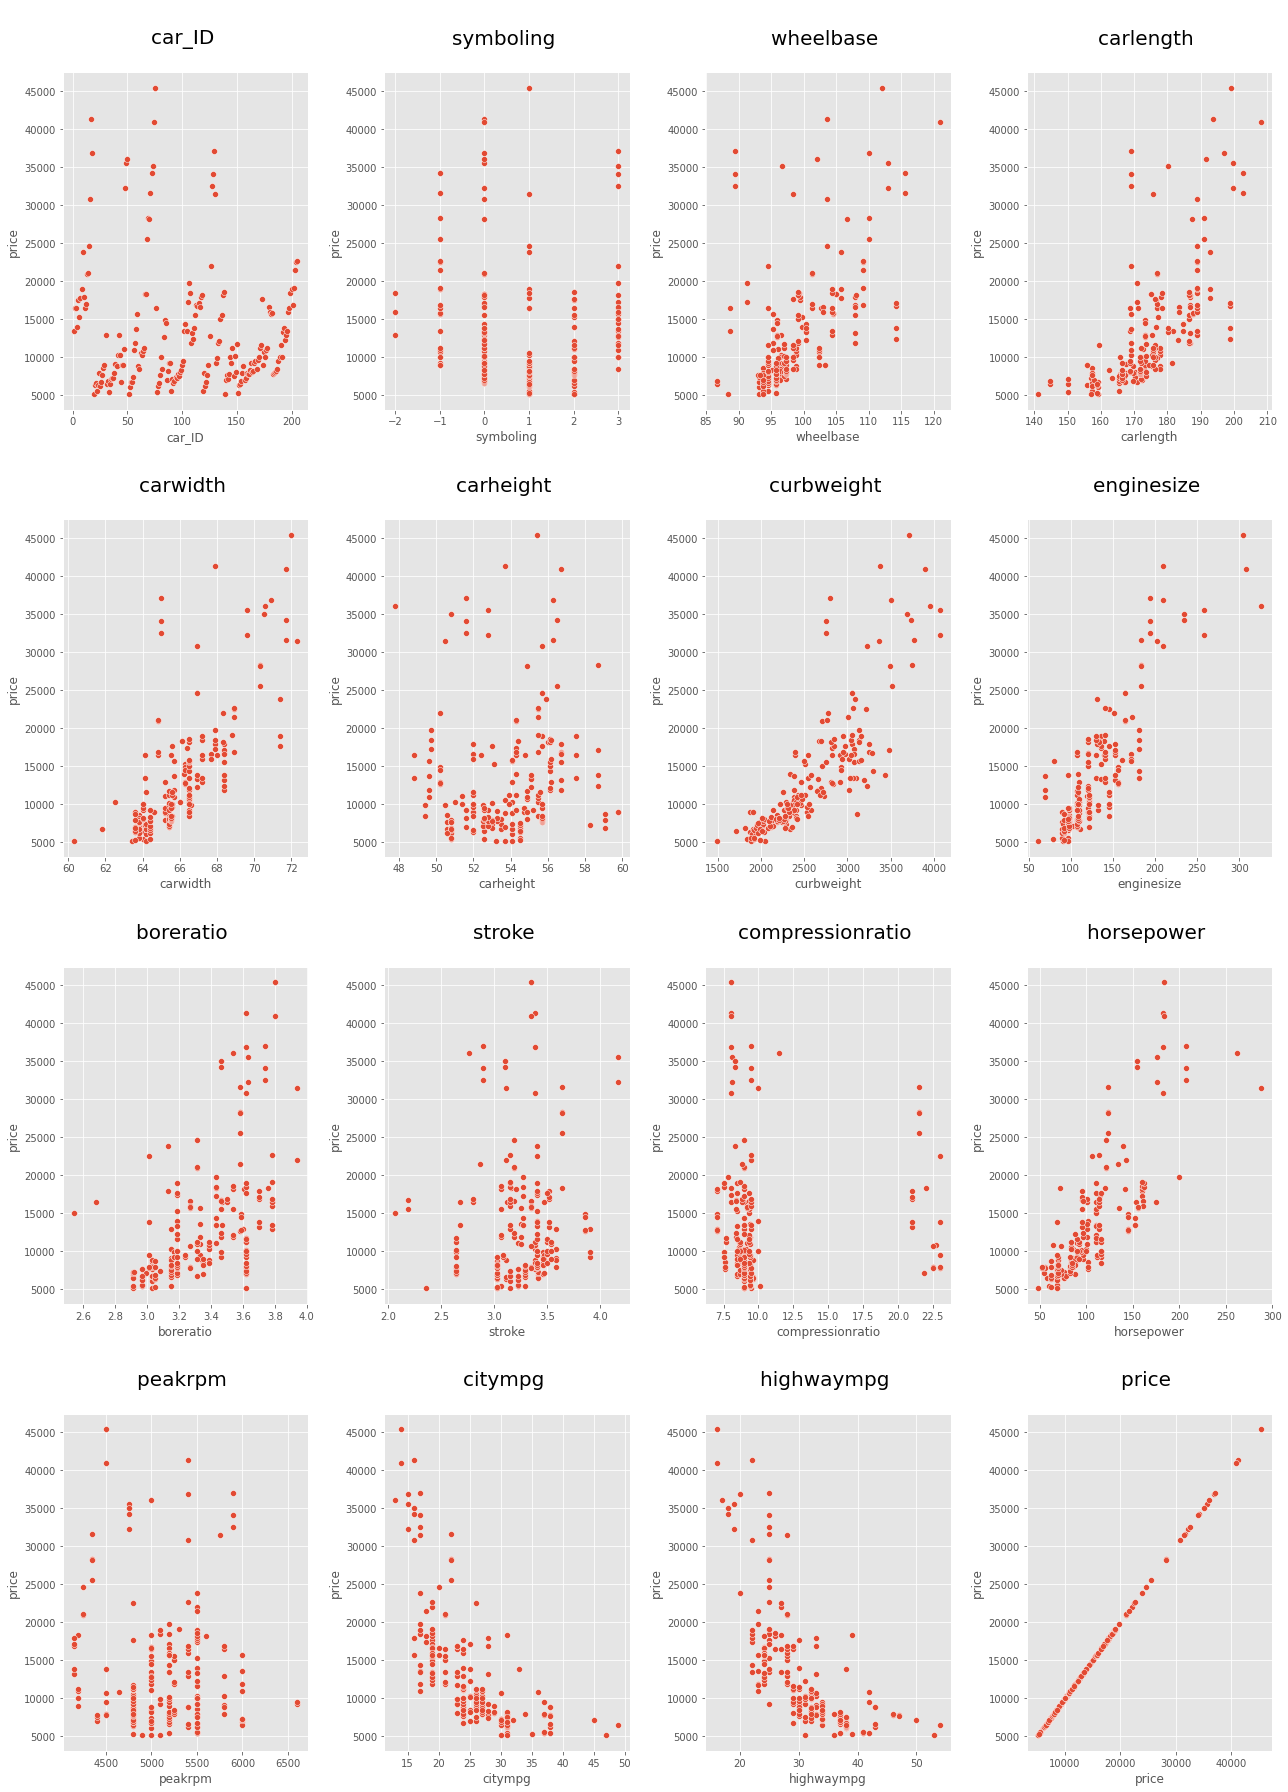

In [35]:
cols = numerical.columns

plt.figure(figsize = (18, 25))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

- horsepower increases price increase.
- engine size increase price increase.
- carwidth and curbweight increases price increase.



<AxesSubplot: xlabel='carwidth', ylabel='price'>

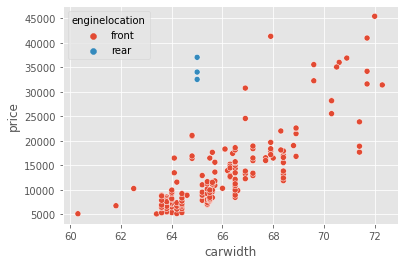

In [36]:
sns.scatterplot(data=df, x="carwidth", y="price",hue='enginelocation')

<AxesSubplot: xlabel='carbody', ylabel='price'>

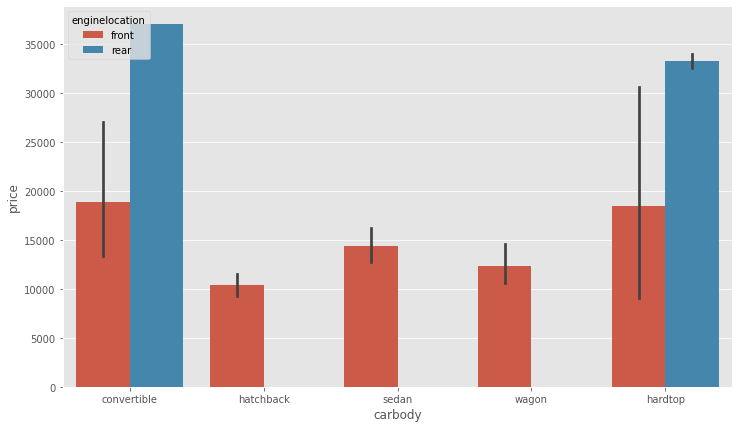

In [37]:
plt.figure(figsize = (12, 7))
sns.barplot(data=df, x="carbody", y="price",hue='enginelocation')

- In sedan,hatchback and wagon engine location is at front.
- Hardtop and convertible carbody have engine at the back ,so it is costly.
- Mostly people buy sedan,hatchback and wagon because it's prize is low.

<AxesSubplot: xlabel='carwidth', ylabel='price'>

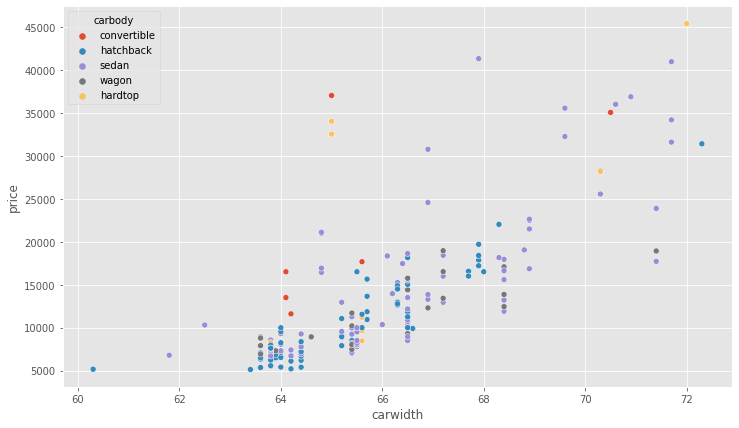

In [38]:
plt.figure(figsize = (12, 7))
sns.scatterplot(data=df, x="carwidth", y="price",hue='carbody')

- mostly carwidth is in range 64-68.

<AxesSubplot: xlabel='horsepower', ylabel='price'>

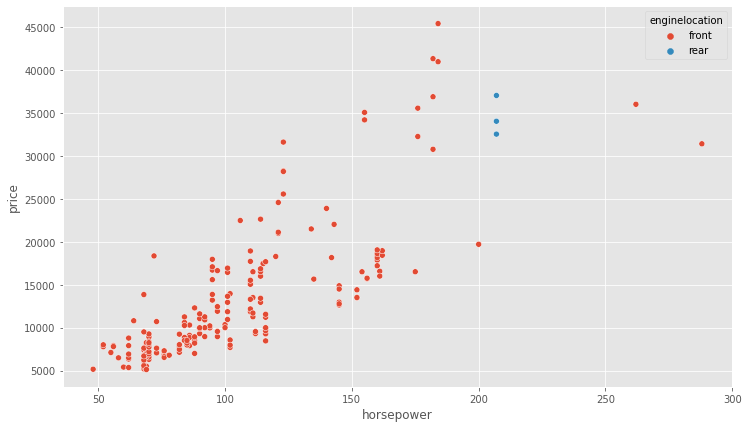

In [39]:
plt.figure(figsize = (12, 7))
sns.scatterplot(data=df, x="horsepower", y="price",hue='enginelocation')

- rear engine location have high horse power than front engine location.

<AxesSubplot: xlabel='enginelocation', ylabel='price'>

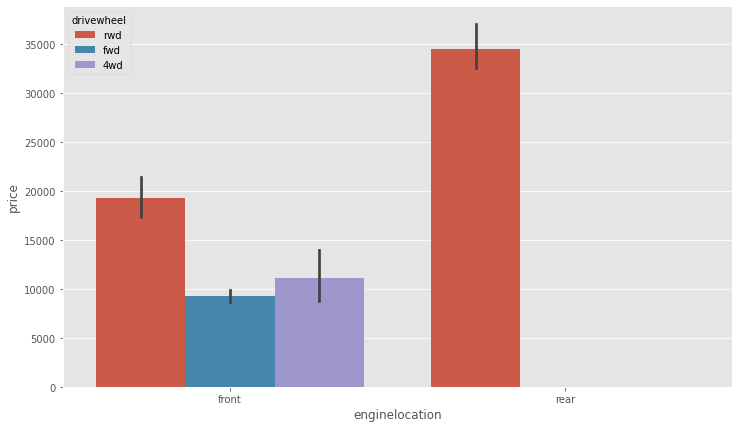

In [40]:
plt.figure(figsize = (12, 7))
sns.barplot(data=df, x="enginelocation", y="price",hue='drivewheel')

<AxesSubplot: xlabel='enginelocation', ylabel='price'>

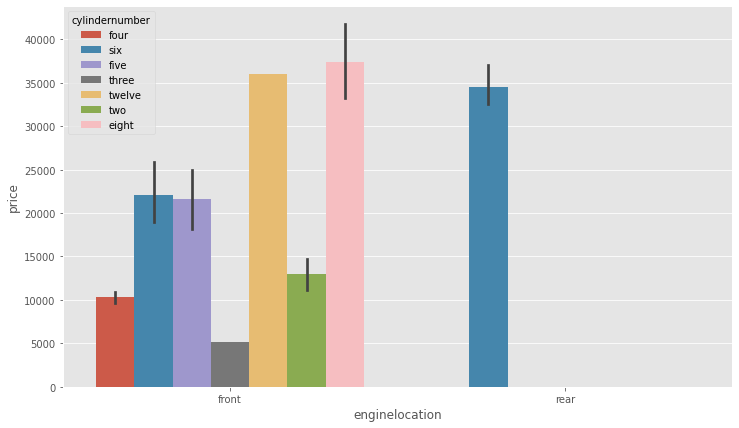

In [41]:
plt.figure(figsize = (12, 7))
sns.barplot(data=df, x="enginelocation", y="price",hue='cylindernumber')

- In rear engine location,six cylinders are there.

 - So,most important features are:
 - 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'price'
 
    

In [42]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Data Preprocessing

In [43]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [44]:
df.drop(columns = ['car_ID','CarName'], axis = 1, inplace = True)

In [45]:
# encoding ordinal categorical columns

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [46]:
# creating features and label variable

X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [47]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test) 


r2_score(y_test,y_pred)

0.7758213608170533

In [51]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)

r2_score(y_test,y_predict)

0.891513441932888

In [52]:
## Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)

r2_score(y_test,y_predict)

0.9119597819521952

In [53]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)
y_predict=xgb.predict(X_test)

r2_score(y_test,y_predict)

0.9056417427454314

In [54]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','XgBoost'],
    'Score' : [reg.score(X_test, y_test), DTree.score(X_test, y_test), RForest.score(X_test, y_test),xgb.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest,0.911960
3,XgBoost,0.905642
1,Decision Tree,0.891513
0,Linear Regression,0.775821
